# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importando Dataset

In [2]:
# Pegando apenas a 23 coluna para fazer o data frame 
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/Volt(7)/11072024-093556.csv",skiprows=1,header=None) 
print(df.head())

         0         1         2         3    4        5        6         7   \
0  1402.546 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375  0.137695   
1  1402.565 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375  0.137695   
2  1402.599 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375  0.137695   
3  1402.633 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375  0.137695   
4  1402.665 -0.117188  0.856445  0.152344 -0.5  2.43750 -0.18750  0.137695   

         8         9   ...        15       16      17       18        19  \
0  0.366211  0.950195  ... -0.084961 -0.43750  4.8125 -7.40625  176.3942   
1  0.366211  0.950195  ... -0.084961 -0.43750  4.8125 -7.40625  176.3942   
2  0.366211  0.950195  ... -0.084961 -0.43750  4.8125 -7.40625  176.3942   
3  0.366211  0.950195  ... -0.084961 -0.43750  4.8125 -7.40625  176.3942   
4  0.366211  0.950195  ... -0.309570  0.84375  4.5000 -1.65625  176.3942   

         20        21        22        23        24  
0  213.9022  120.118

In [3]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       711 non-null    float64
 1   1       711 non-null    float64
 2   2       711 non-null    float64
 3   3       711 non-null    float64
 4   4       711 non-null    float64
 5   5       711 non-null    float64
 6   6       711 non-null    float64
 7   7       711 non-null    float64
 8   8       711 non-null    float64
 9   9       711 non-null    float64
 10  10      711 non-null    float64
 11  11      711 non-null    float64
 12  12      711 non-null    float64
 13  13      711 non-null    float64
 14  14      711 non-null    float64
 15  15      711 non-null    float64
 16  16      711 non-null    float64
 17  17      711 non-null    float64
 18  18      711 non-null    float64
 19  19      711 non-null    float64
 20  20      711 non-null    float64
 21  21      711 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.00000,711.000000,711.000000
mean,1414.361274,-0.052005,0.893261,-0.256723,-0.011339,-0.960487,-0.241781,0.129859,0.506999,0.750448,...,-0.203255,-0.081092,-0.776064,-0.135812,175.199517,218.810991,136.335075,144.53345,108.994551,142.400702
std,6.846237,0.088509,0.117831,0.304979,38.950685,8.703226,8.185345,0.124130,0.280192,0.287019,...,0.116419,11.425726,10.886374,6.019802,3.763873,3.757056,25.186254,8.77661,5.246471,23.267896
min,1402.546000,-0.302734,0.312500,-1.269531,-89.968750,-23.218750,-27.656250,-0.121094,-0.345703,-0.112305,...,-0.593750,-43.406250,-26.875000,-27.968750,167.810200,209.401500,116.522900,129.12540,94.577000,120.739800
25%,1408.444500,-0.118164,0.833984,-0.440430,-24.843750,-3.500000,-3.906250,0.055664,0.327148,0.614258,...,-0.271484,-2.031250,-4.312500,-1.750000,172.152800,215.223150,119.675700,138.66650,105.562300,126.423400
50%,1414.357000,-0.042969,0.914062,-0.126953,-0.312500,-0.250000,0.156250,0.126953,0.412109,0.843750,...,-0.199219,0.000000,-0.750000,0.031250,174.350900,219.951900,120.822200,142.61940,109.793900,130.993800
75%,1420.269000,0.003906,0.961426,-0.015625,17.625000,1.750000,5.406250,0.208496,0.703125,0.952148,...,-0.129883,1.812500,1.812500,2.000000,177.199900,221.414800,147.930000,147.81100,112.714900,152.831900
max,1426.182000,0.156250,1.156250,0.191406,104.156300,37.875000,22.500000,0.891602,1.115234,1.138672,...,0.088867,36.312500,60.718750,16.093750,184.158100,231.918800,194.773000,165.80690,121.765900,197.841000


In [4]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [5]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0         1         2         3    4        5        6   \
Tempo (s)                                                                  
0.000000   1402.546 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375   
0.033333   1402.565 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375   
0.066667   1402.599 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375   
0.100000   1402.633 -0.044922  0.893555 -0.019531 -1.0 -2.15625  3.84375   
0.133333   1402.665 -0.117188  0.856445  0.152344 -0.5  2.43750 -0.18750   

                 7         8         9   ...        15       16      17  \
Tempo (s)                                ...                              
0.000000   0.137695  0.366211  0.950195  ... -0.084961 -0.43750  4.8125   
0.033333   0.137695  0.366211  0.950195  ... -0.084961 -0.43750  4.8125   
0.066667   0.137695  0.366211  0.950195  ... -0.084961 -0.43750  4.8125   
0.100000   0.137695  0.366211  0.950195  ... -0.084961 -0.43750  4.8125   
0.133333   0.1376

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [6]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  711.000000  711.000000  711.000000
mean   175.199517  218.810991  136.335075
std      3.763873    3.757056   25.186254
min    167.810200  209.401500  116.522900
25%    172.152800  215.223150  119.675700
50%    174.350900  219.951900  120.822200
75%    177.199900  221.414800  147.930000
max    184.158100  231.918800  194.773000

Análise do Joelho:
        Joelho X    Joelho Y    Joelho Z
count  711.00000  711.000000  711.000000
mean   144.53345  108.994551  142.400702
std      8.77661    5.246471   23.267896
min    129.12540   94.577000  120.739800
25%    138.66650  105.562300  126.423400
50%    142.61940  109.793900  130.993800
75%    147.81100  112.714900  152.831900
max    165.80690  121.765900  197.841000


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

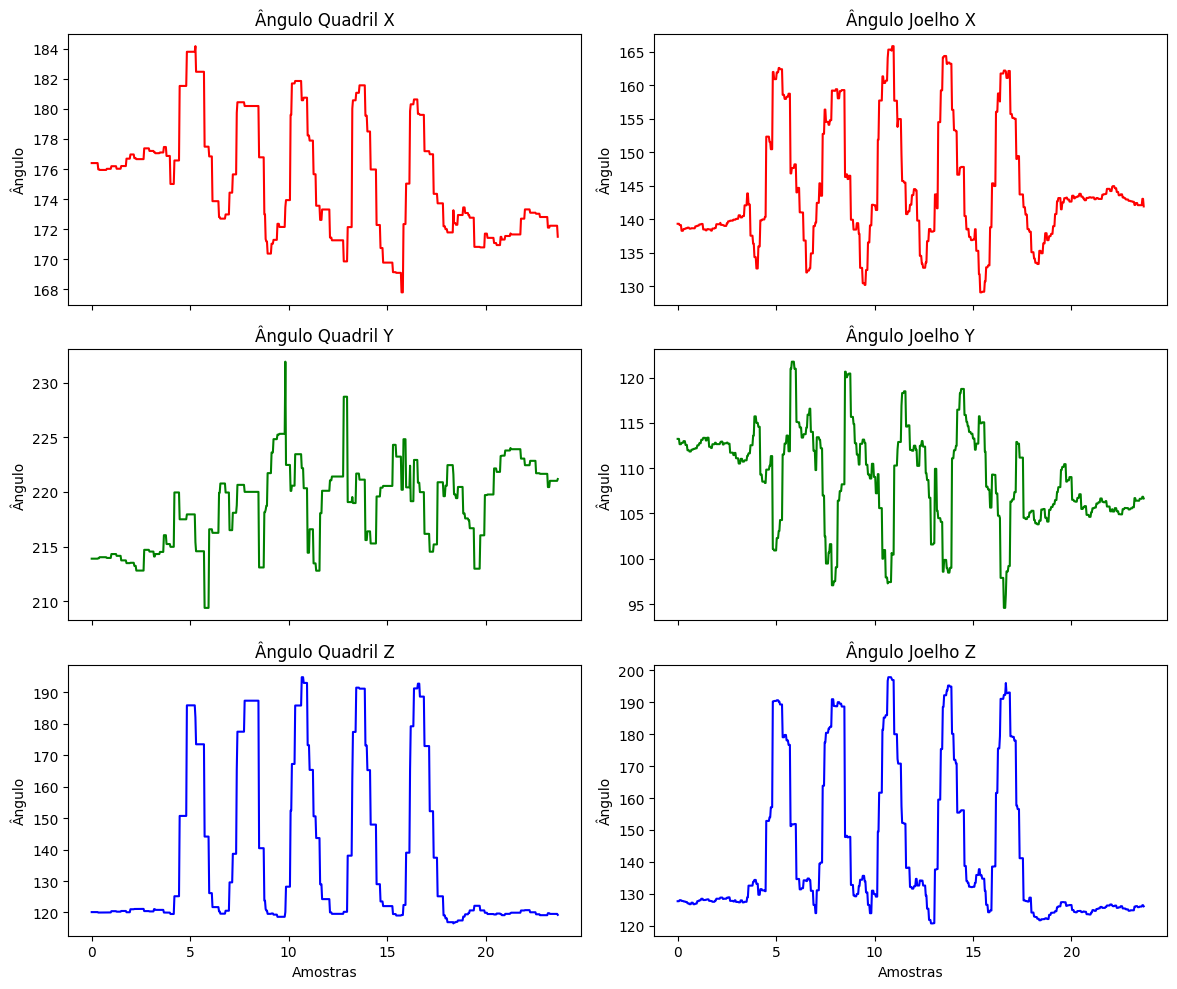

In [7]:
# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True, )

# Plot ângulos do quadril
axes[0, 0].plot(quadril_x, color="red")
axes[0, 0].set_title("Ângulo Quadril X")
axes[0, 0].set_ylabel("Ângulo")

axes[1, 0].plot(quadril_y, color="green")
axes[1, 0].set_title("Ângulo Quadril Y")
axes[1, 0].set_ylabel("Ângulo")

axes[2, 0].plot(quadril_z, color="blue")
axes[2, 0].set_title("Ângulo Quadril Z")
axes[2, 0].set_xlabel("Amostras")
axes[2, 0].set_ylabel("Ângulo")

# Plot ângulos do joelho
axes[0, 1].plot(joelho_x, color="red")
axes[0, 1].set_title("Ângulo Joelho X")
axes[0, 1].set_ylabel("Ângulo")

axes[1, 1].plot(joelho_y, color="green")
axes[1, 1].set_title("Ângulo Joelho Y")
axes[1, 1].set_ylabel("Ângulo")

axes[2, 1].plot(joelho_z, color="blue")
axes[2, 1].set_title("Ângulo Joelho Z")
axes[2, 1].set_xlabel("Amostras")
axes[2, 1].set_ylabel("Ângulo")

plt.tight_layout()
plt.show()

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

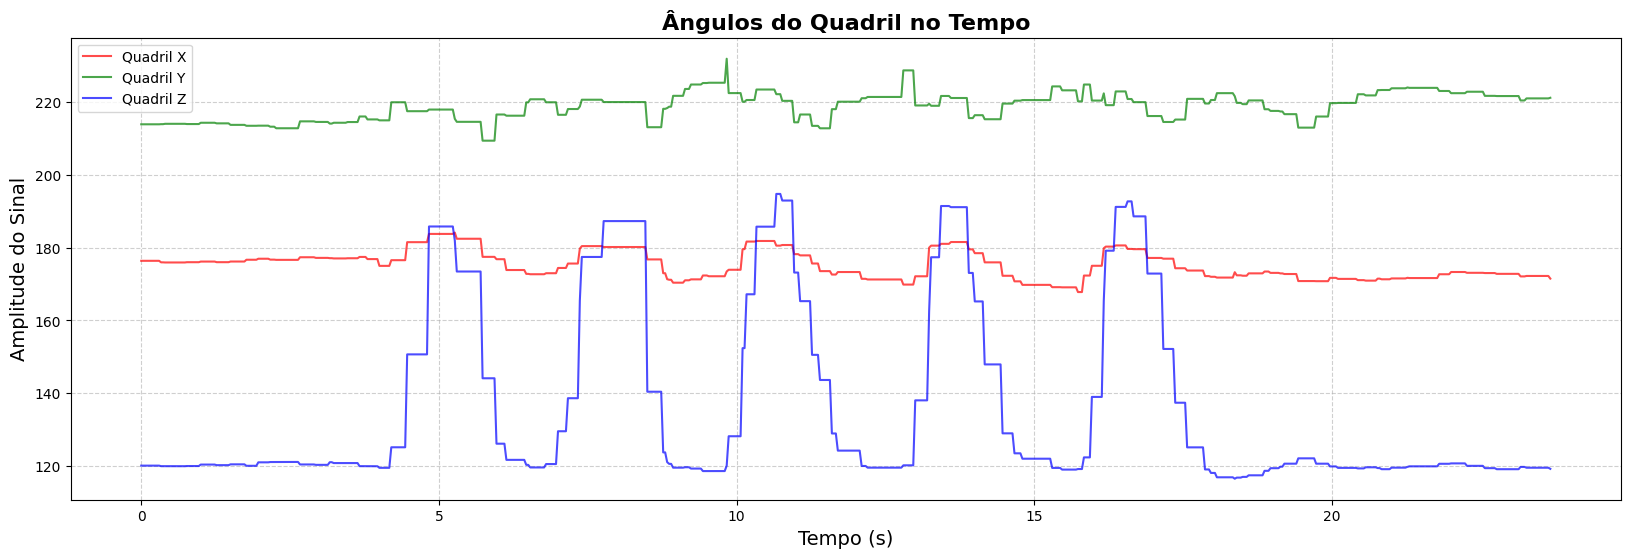

In [8]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

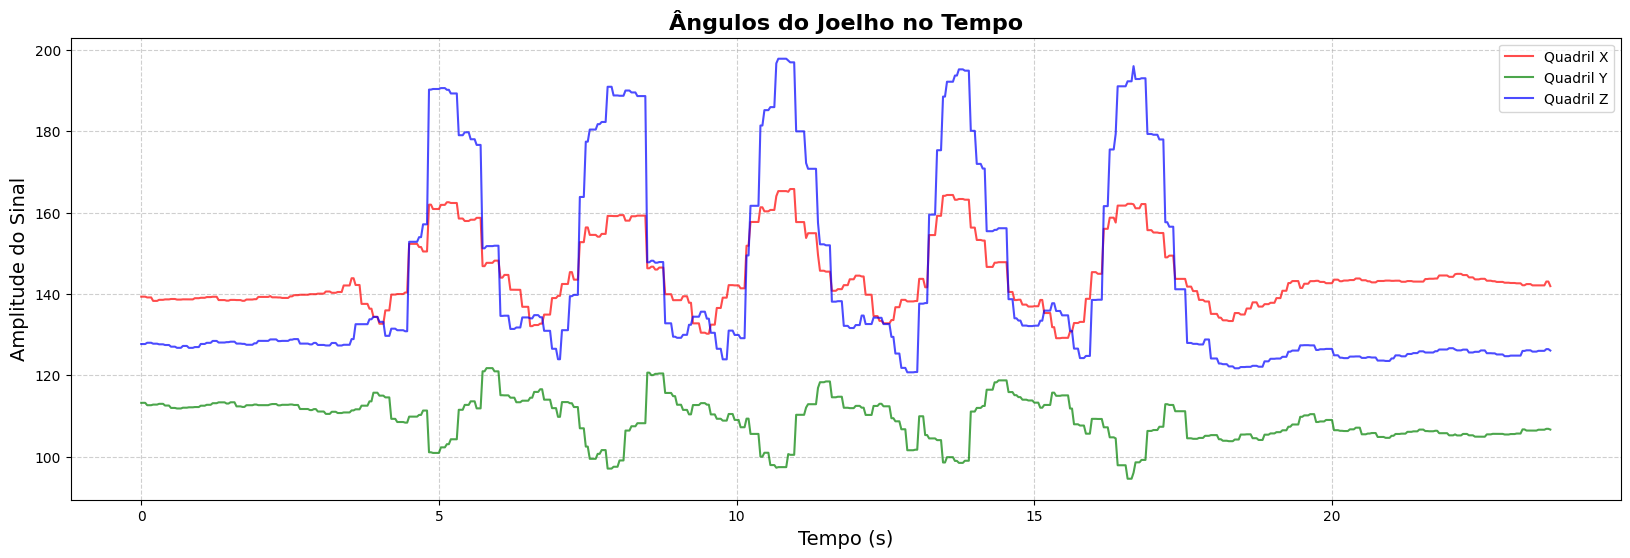

In [9]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.









## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

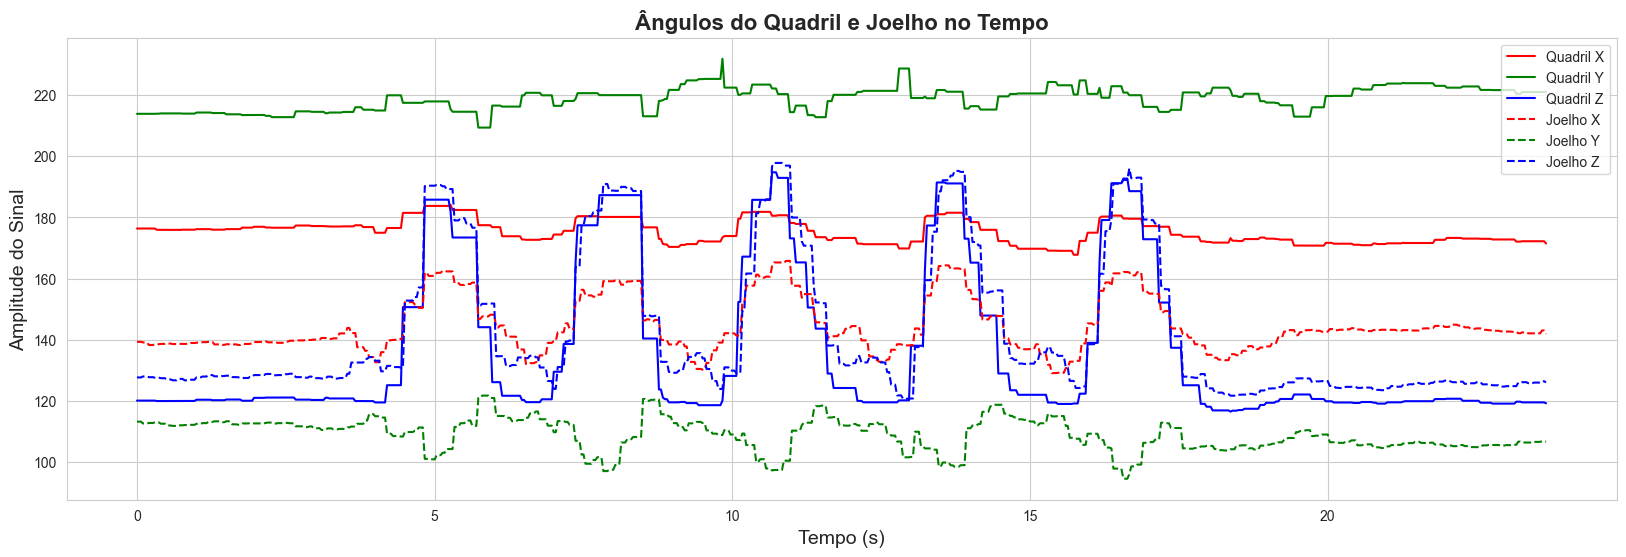

In [10]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

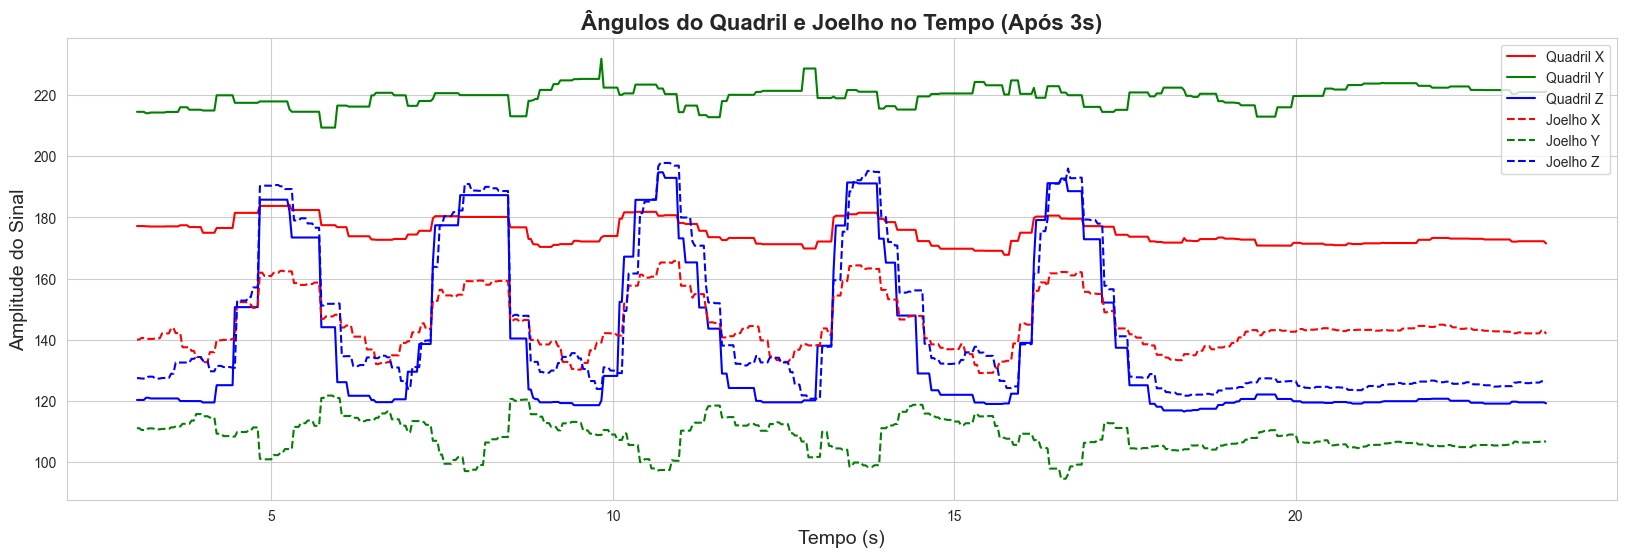

In [11]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.